<a href="https://colab.research.google.com/github/kamabdi/intro_to_DL/blob/master/Intorduction_to_DL_AI_ML_Seminar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is classification?
Basic task in Computer Vision

![alt text](https://cdn-images-1.medium.com/max/1600/1*oB3S5yHHhvougJkPXuc8og.gif)

# Why it is difficult?!

1.   Semantic Gap - Did machines see the same way we do? Nope
2.   Illumination
3.   View point
4.   Deformation
5.   Occlusion
6.   Background Clutter
7.   Intraclass variation



## How to approach the Problem???  

Just collect the data and hope algorithm will figure it out (aka Data-Driven Approach): 

1. Collect a dataset of images and labels (Easier sad than done)
2. Use Machine Learning to train a classifier
3. Evaluate the classifier on new images

![alt text](https://imgs.xkcd.com/comics/machine_learning.png)



# Now how we can implement that?
#### What you'll learn

1. What is a neural network
2. How to build a basic 1-layer FC neural network using PyTorch
3. How to add more layers
4. How to build convolutional networks and train them



# Import all necessary packages

In [1]:
import torch
import torch.nn as nn
import PIL.Image as image
import torchvision.models as model
from torch.autograd import Variable as v
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import torchvision.datasets as datasets
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

In [2]:
# Check what hardware is available
!nvidia-smi

Sun Jun 21 11:41:34 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8    30W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Load data
For this experiments we will be using MNIST dataset

In [3]:
root = './data'
download = True
batch_size = 64
cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

kwargs = {'num_workers': 1, 'pin_memory': True} if cuda else {}
# The output of torchvision datasets are PILImage images of range [0, 1].
# We transform them to Tensors of normalized range [-1, 1]

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST(root, train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=batch_size, shuffle=True, **kwargs)


test_loader = torch.utils.data.DataLoader(
    datasets.MNIST(root, train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size = batch_size, shuffle=True, **kwargs)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


# Look at your data

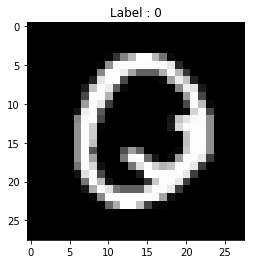

In [14]:
def imshow(inp, name, title=None):
    import pylab
    """Imshow for Tensor."""
    inp = inp.squeeze().numpy()
    mean = np.array([0.1307])
    std = np.array([0.3081])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp,  cmap=pylab.gray())
    
    if title is not None:
        plt.title("Label : " + str(title))
    
for batch_idx, (data, target) in enumerate(train_loader):
  id = 1 # change number to any id in the batch 
  sample = data[id] 
  imshow(sample, 'sample', target[id].item())
  break
  

# Create a model for training
TO DO: Use two different loss functions: Sigmoid and ReLu, and see if there is a difference in accuracy

## FC

Let's start with a simple Fully Connected Network

![alt text](https://codelabs.developers.google.com/codelabs/cloud-tensorflow-mnist/img/e218e6eee9da4e.png)

In [15]:
# New model class is defined as a new nn.Module
class Simple_FC(nn.Module):
    def __init__(self, input_size=784, num_classes=10):
        super(Simple_FC, self).__init__()
        self.fc1 = nn.Linear(input_size, num_classes)  
    
    def forward(self, x):
        x = x.view(-1, 784)
        out = self.fc1(x) # weighted sum of input and network weights -> Wx+b, b - bias
        return out 

In [16]:
class Complex_FC(nn.Module):
    def __init__(self, input_size=784, hidden_size=500, num_classes=10):
        super(Complex_FC, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.activation = nn.ReLU()
        # self.activation = nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        x = x.view(-1, 784) # flatten the input
        out = self.fc1(x)
        out = self.activation(out)
        out = self.fc2(out)
        return out

![alt text](https://codelabs.developers.google.com/codelabs/cloud-tensorflow-mnist/img/fba0638cc213a29.png)

In [17]:
class Deep_FC(nn.Module):
    def __init__(self, input_size=784, num_classes=10):
        super(Deep_FC, self).__init__()
        self.fc1 = nn.Linear(input_size, 200) 
        # self.activation = nn.Sigmoid()
        self.activation = nn.ReLU()
        self.fc2 = nn.Linear(200, 100)  
        self.fc3 = nn.Linear(100, 60) 
        self.fc4 = nn.Linear(60, 30)  
        self.fc5 = nn.Linear(30, num_classes)  
    
    def forward(self, x):
        x = x.view(-1, 784)
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        x = self.activation(x)
        x = self.fc3(x)
        x = self.activation(x)
        x = self.fc4(x)
        x = self.activation(x)
        x = self.fc5(x)
        return x

## CNN
Now let's see how we get even more from the network with a better architecture (CNN) 

![alt text](https://i.stack.imgur.com/FjvuN.gif)

In [18]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.fc1 = nn.Linear(16*20, 50) # Fully Connected Layers 
        self.fc2 = nn.Linear(50, 10)
        self.bn1 = nn.BatchNorm2d(10)
        self.bn2 = nn.BatchNorm2d(20)
        self.bn3 = nn.BatchNorm1d(50)
        # self.activation = nn.Sigmoid()
        self.activation = nn.ReLU()

    def forward(self, x):

        x = self.activation(F.max_pool2d(self.bn1(self.conv1(x)), 2))
        x = self.activation(F.max_pool2d(self.bn2(self.conv2(x)), 2))
        
        x = x.view(-1, 16*20) # flatten input to feed it to fully connected layer
        x = self.activation(self.bn3(self.fc1(x)))
        x = F.dropout(x, p=0.25)
        x = self.fc2(x)
        
        return x

## Pick model for testing

In [27]:
# model = Simple_FC()
model = Complex_FC()
# model = Deep_FC()
# model = CNN()

model = model.to(device) # send model to GPU if available

# Define a Loss Function(Criterion) and an Optimizer


## How to choose your learning rate ???

Hyperparameter - not-learanable parameter and picked manually in the begining of training \\
Try and see what works best \\

Check behavious: 
1. Simple_FC with lr = 0.01, 0.001, 0.0001
2. Complex_FC with lr = 0.01, 0.001, 0.0001
3. CNN with lr = 0.1, 0.01 

![alt text](http://cs231n.github.io/assets/nn3/learningrates.jpeg)

## Momentum ??? 
 - running average of previous updates! Small oscillations 
 
 `V = momentum*V + (1-momentum)*gradient_of_parameters`
 
![alt text](https://cdn-images-1.medium.com/max/1600/1*5-GPmnonHVQiIj2EPG3Fgw.png)

Without Momentum -> 

```
update = learning_rate * gradient_of_parameters
parameters = parameters - update

```

![alt text](https://qph.fs.quoracdn.net/main-qimg-7adad11c6ee947a96e917e2a8205392d)

With Momentum 
```
V = momentum*V + (1-momentum)*gradient_of_parameters
W = W - learning_rate * V

```

![alt text](https://i.ytimg.com/vi/WpHh188mwJA/hqdefault.jpg)



## Loss? How cross-entropy loss is calculated? 
Loss is a way to quantifying what it means to have a “good” classifier
![alt text](https://codelabs.developers.google.com/codelabs/cloud-tensorflow-mnist/img/6dbba1bce3cadc36.png)


**Note!!!** In Pytorch obtaining log-probabilities in a neural network is easily achieved by adding a  `LogSoftmax`  layer in the last layer of your network and use `NLLLoss` (The negative log likelihood loss)
You may use `CrossEntropyLoss` instead, if you prefer not to add an extra layer.

## How is essentially optimization works? (in the Perfect World)
![alt text](https://cdn-images-1.medium.com/max/1600/1*bl1EuPH_XEGvMcMW6ZloNg.jpeg)




## But real life is not perfect. So your real function will probably look like that. Still quit good 
In this picture, loss is represented as a function of 2 parameters. In reality, there are many more
![alt text](https://cdn-images-1.medium.com/max/1200/1*msObu3xbQzSnKvtCW2z6YQ.png)

In [34]:
# !!! NOTE !!! Reset these parameters, each time you create a new model 
lr = 0.01 
momentum = 0.9
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

# Specify the training Procedure

In [32]:
log_interval = 100
def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device) # send data to GPU for faster compute, if GPU is available

        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward() # calculate gradients
        optimizer.step() # update network parameters
            
        if batch_idx % log_interval == 0:
            # Compute accuracy
            _, argmax = torch.max(output, 1)
            accuracy = (target == argmax.squeeze()).float().mean()

            print('Train Epoch: {} [{}/{} ({:.00f}%)]\tLoss: {:.6f}\tAccuracy: {:.3f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data.item(), accuracy))
            


# Check the model accuracy 

In [24]:
def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
       # with torch.no_grad(): # use when don't want to compute the gradient
        output = model(data)
        test_loss += criterion(output, target).data.item()
        pred = output.data.max(1)[1] # get the index of the max log-probability
        correct += pred.eq(target.data).cpu().sum()

    test_loss = test_loss
    test_loss /= len(test_loader) # loss function already averages over batch size
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

# Let's Finally Train your Created Model

In [33]:
epochs = 1
for epoch in range(1, epochs + 1):
   # adjust_learning_rate(lr, optimizer, epoch)
    train(epoch)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.223624	Accuracy: 0.953
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.061369	Accuracy: 0.984
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.038098	Accuracy: 1.000
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.130585	Accuracy: 0.953
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.191156	Accuracy: 0.938
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.128493	Accuracy: 0.984
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.092704	Accuracy: 0.969
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.103412	Accuracy: 0.953
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.260254	Accuracy: 0.922
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.095010	Accuracy: 0.969


In [31]:
test()


Test set: Average loss: 0.1304, Accuracy: 9622/10000 (96.22%)



# What to do next 


1.   More complex Datasets (CIFAR, ImageNet). You even can make your own
2.   Transfer Learning from Pre-trained models. 
3.   How my filters look like ???? Feature Visualization

